# Pet Adoption Classification

## Problem Definition
Predict pet adoption speed. Adoption speed is expressed as ranges of number of days (ie. classes labeled 0, 1, 2, 3, 4).

In [30]:
# import necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## Load Data

In [31]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape, df_test.shape)

(10000, 24) (4993, 23)


## Clean Up and Examine Dataset

In [32]:
df_train = df_train.drop(['RescuerID', 'PetID'], axis=1)
df_test = df_test.drop(['RescuerID'], axis=1)

In [33]:
# examine df_train
print(df_train.columns)
df_train.head()

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'Description', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PhotoAmt,AdoptionSpeed
0,1,â¥â¥â¥ Lily â¥â¥â¥,36,307,0,2,2,7,0,2,...,2,1,1,1,0,41326,0,Adorable 3 year old Lily looking for a forever...,1.0,4
1,2,Cookie,3,266,0,1,6,7,0,2,...,1,2,1,1,0,41327,0,i rescue this stary kitten from market near my...,1.0,2
2,2,Favour Speedy Abundance And Courage,7,250,252,1,1,2,0,2,...,1,2,1,4,0,41327,0,The mother was a Burmese cross and had since p...,2.0,4
3,1,NaN,3,307,0,1,2,0,0,3,...,2,2,1,1,0,41327,0,This puppy is: 1. Male 2. 3 months old 3. Brow...,4.0,2
4,2,Abandoned Kitty,1,266,0,1,1,6,7,1,...,2,2,1,1,0,41401,0,Mother cat gave birth to a litter of 3 and too...,0.0,2


In [34]:
# examine df_test
print(df_test.columns)
df_test.head()

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'Description', 'PetID', 'PhotoAmt'],
      dtype='object')


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PetID,PhotoAmt
0,2,Sincan,1,266,266,1,1,7,0,2,...,2,2,1,1,0,41326,0,Found this male kitten today. He looks healthy...,f42161740,10.0
1,1,Zone A2 P16,6,307,0,2,2,0,0,1,...,1,2,1,1,0,41326,0,I need a new home!! Contact Furry Friends Farm...,0118db3a8,2.0
2,1,Pixie,2,307,0,2,3,0,0,2,...,1,2,1,1,0,41401,0,very playful cute little puppy for adoption. R...,e5164d828,2.0
3,1,Bullet,10,128,0,1,7,0,0,2,...,1,2,1,1,0,41326,0,"bullet is a wonderful, loving dog. the kind th...",5335bfb38,0.0
4,1,JACKSON,12,307,0,1,2,0,0,2,...,1,1,1,1,0,41326,0,Meet Jackson. He's a eye catcher and always re...,ff2cf88a0,2.0


## Missing Values

In [35]:
# see how many missing values exist and where they are
print('Train:')
print(df_train.isnull().sum())
print('')
print('Test:')
print(df_test.isnull().sum())

Train:
Type               0
Name             842
Age                0
Breed1             0
Breed2             0
Gender             0
Color1             0
Color2             0
Color3             0
MaturitySize       0
FurLength          0
Vaccinated         0
Dewormed           0
Sterilized         0
Health             0
Quantity           0
Fee                0
State              0
VideoAmt           0
Description        8
PhotoAmt           0
AdoptionSpeed      0
dtype: int64

Test:
Type              0
Name            415
Age               0
Breed1            0
Breed2            0
Gender            0
Color1            0
Color2            0
Color3            0
MaturitySize      0
FurLength         0
Vaccinated        0
Dewormed          0
Sterilized        0
Health            0
Quantity          0
Fee               0
State             0
VideoAmt          0
Description       4
PetID             0
PhotoAmt          0
dtype: int64


## See the Contents of Features that can be Numerical or Categorical

In [36]:
df_train.groupby('MaturitySize').count()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,FurLength,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PhotoAmt,AdoptionSpeed
MaturitySize,,,,,,,,,,,,,,,,,,,,,
1,2261,2018,2261,2261,2261,2261,2261,2261,2261,2261,...,2261,2261,2261,2261,2261,2261,2261,2259,2261,2261
2,6879,6334,6879,6879,6879,6879,6879,6879,6879,6879,...,6879,6879,6879,6879,6879,6879,6879,6875,6879,6879
3,842,789,842,842,842,842,842,842,842,842,...,842,842,842,842,842,842,842,840,842,842
4,18,17,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18


In [37]:
df_train.groupby('FurLength').count()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PhotoAmt,AdoptionSpeed
FurLength,,,,,,,,,,,,,,,,,,,,,
1,5865,5355,5865,5865,5865,5865,5865,5865,5865,5865,...,5865,5865,5865,5865,5865,5865,5865,5861,5865,5865
2,3591,3288,3591,3591,3591,3591,3591,3591,3591,3591,...,3591,3591,3591,3591,3591,3591,3591,3588,3591,3591
3,544,515,544,544,544,544,544,544,544,544,...,544,544,544,544,544,544,544,543,544,544


In [38]:
df_train.groupby('Dewormed').count()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PhotoAmt,AdoptionSpeed
Dewormed,,,,,,,,,,,,,,,,,,,,,
1,5625,5387,5625,5625,5625,5625,5625,5625,5625,5625,...,5625,5625,5625,5625,5625,5625,5625,5621,5625,5625
2,3200,2741,3200,3200,3200,3200,3200,3200,3200,3200,...,3200,3200,3200,3200,3200,3200,3200,3198,3200,3200
3,1175,1030,1175,1175,1175,1175,1175,1175,1175,1175,...,1175,1175,1175,1175,1175,1175,1175,1173,1175,1175


In [39]:
df_train.groupby('Vaccinated').count()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,Description,PhotoAmt,AdoptionSpeed
Vaccinated,,,,,,,,,,,,,,,,,,,,,
1,3988,3840,3988,3988,3988,3988,3988,3988,3988,3988,...,3988,3988,3988,3988,3988,3988,3988,3985,3988,3988
2,4790,4242,4790,4790,4790,4790,4790,4790,4790,4790,...,4790,4790,4790,4790,4790,4790,4790,4787,4790,4790
3,1222,1076,1222,1222,1222,1222,1222,1222,1222,1222,...,1222,1222,1222,1222,1222,1222,1222,1220,1222,1222


In [40]:
df_train.groupby('Sterilized').count()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated,Dewormed,Health,Quantity,Fee,State,VideoAmt,Description,PhotoAmt,AdoptionSpeed
Sterilized,,,,,,,,,,,,,,,,,,,,,
1,2080,2001,2080,2080,2080,2080,2080,2080,2080,2080,...,2080,2080,2080,2080,2080,2080,2080,2078,2080,2080
2,6737,6131,6737,6737,6737,6737,6737,6737,6737,6737,...,6737,6737,6737,6737,6737,6737,6737,6734,6737,6737
3,1183,1026,1183,1183,1183,1183,1183,1183,1183,1183,...,1183,1183,1183,1183,1183,1183,1183,1180,1183,1183


In [41]:
df_train.groupby('Health').count()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Vaccinated,Dewormed,Sterilized,Quantity,Fee,State,VideoAmt,Description,PhotoAmt,AdoptionSpeed
Health,,,,,,,,,,,,,,,,,,,,,
1,9680,8867,9680,9680,9680,9680,9680,9680,9680,9680,...,9680,9680,9680,9680,9680,9680,9680,9674,9680,9680
2,299,270,299,299,299,299,299,299,299,299,...,299,299,299,299,299,299,299,297,299,299
3,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21


## Feature Engineering

In [42]:
# add 'NoName' feature to indicate if pet does (0) or does not (1) have a name
df_train['NoName'] = df_train['Name'].isna().astype(int)
df_test['NoName'] = df_test['Name'].isna().astype(int)

# add 'NoDescription' feature to indicate if there is (0) a description or not (1)
df_train['NoDescription'] = df_train['Description'].isna().astype(int)
df_test['NoDescription'] = df_test['Description'].isna().astype(int)

In [43]:
# remove outliers of numerical features
numeric_cols = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

# function to get replace of outliers with +/- 3 SD value in numerical column if present
def handleOutliers(value, col_mean, col_std):
    low_end = col_mean - 3*col_std
    high_end = col_mean + 3*col_std
    
    if value < low_end:
        return low_end
    elif value > high_end:
        return high_end
    else:
        return value

# make new outlier-free numerical features; NO stands for No Outliers
for col in numeric_cols:
    df_train[col+'_NO'] = df_train[col].apply(handleOutliers, args=(df_train[col].mean(), df_train[col].std(),))

for col in numeric_cols:
    df_test[col+'_NO'] = df_test[col].apply(handleOutliers, args=(df_test[col].mean(), df_test[col].std(),))

In [44]:
# one-hot encode relevant categorical columns in train dataset
df_type = pd.get_dummies(df_train['Type'], prefix='Type')
df_train = pd.concat([df_train, df_type], axis=1)

df_breed1 = pd.get_dummies(df_train['Breed1'], prefix='Breed1')
df_train = pd.concat([df_train, df_breed1], axis=1)

df_breed2 = pd.get_dummies(df_train['Breed2'], prefix='Breed2')
df_train = pd.concat([df_train, df_breed2], axis=1)

df_gender = pd.get_dummies(df_train['Gender'], prefix='Gender')
df_train = pd.concat([df_train, df_gender], axis=1)

df_color1 = pd.get_dummies(df_train['Color1'], prefix='Color1')
df_train = pd.concat([df_train, df_color1], axis=1)

df_color2 = pd.get_dummies(df_train['Color2'], prefix='Color2')
df_train = pd.concat([df_train, df_color2], axis=1)

df_color3 = pd.get_dummies(df_train['Color3'], prefix='Color3')
df_train = pd.concat([df_train, df_color3], axis=1)

df_size = pd.get_dummies(df_train['MaturitySize'], prefix='MatSize')
df_train = pd.concat([df_train, df_size], axis=1)

df_furlength = pd.get_dummies(df_train['FurLength'], prefix='FurLength')
df_train = pd.concat([df_train, df_furlength], axis=1)

df_vaccinated = pd.get_dummies(df_train['Vaccinated'], prefix='Vaccinated')
df_train = pd.concat([df_train, df_vaccinated], axis=1)

df_dewormed = pd.get_dummies(df_train['Dewormed'], prefix='Dewormed')
df_train = pd.concat([df_train, df_dewormed], axis=1)

df_sterilized = pd.get_dummies(df_train['Sterilized'], prefix='Sterilized')
df_train = pd.concat([df_train, df_sterilized], axis=1)

df_health = pd.get_dummies(df_train['Health'], prefix='Health')
df_train = pd.concat([df_train, df_health], axis=1)

df_state = pd.get_dummies(df_train['State'], prefix='State')
df_train = pd.concat([df_train, df_state], axis=1)

In [45]:
# one-hot encode relevant categorical columns in test dataset
df_test_type = pd.get_dummies(df_test['Type'], prefix='Type')
df_test = pd.concat([df_test, df_test_type], axis=1)

df_test_breed1 = pd.get_dummies(df_test['Breed1'], prefix='Breed1')
df_test = pd.concat([df_test, df_test_breed1], axis=1)

df_test_breed2 = pd.get_dummies(df_test['Breed2'], prefix='Breed2')
df_test = pd.concat([df_test, df_test_breed2], axis=1)

df_test_gender = pd.get_dummies(df_test['Gender'], prefix='Gender')
df_test = pd.concat([df_test, df_test_gender], axis=1)

df_test_color1 = pd.get_dummies(df_test['Color1'], prefix='Color1')
df_test = pd.concat([df_test, df_test_color1], axis=1)

df_test_color2 = pd.get_dummies(df_test['Color2'], prefix='Color2')
df_test = pd.concat([df_test, df_test_color2], axis=1)

df_test_color3 = pd.get_dummies(df_test['Color3'], prefix='Color3')
df_test = pd.concat([df_test, df_test_color3], axis=1)

df_test_size = pd.get_dummies(df_test['MaturitySize'], prefix='MatSize')
df_test = pd.concat([df_test, df_test_size], axis=1)

df_test_furlength = pd.get_dummies(df_test['FurLength'], prefix='FurLength')
df_test = pd.concat([df_test, df_test_furlength], axis=1)

df_test_vaccinated = pd.get_dummies(df_test['Vaccinated'], prefix='Vaccinated')
df_test = pd.concat([df_test, df_test_vaccinated], axis=1)

df_test_dewormed = pd.get_dummies(df_test['Dewormed'], prefix='Dewormed')
df_test = pd.concat([df_test, df_test_dewormed], axis=1)

df_test_sterilized = pd.get_dummies(df_test['Sterilized'], prefix='Sterilized')
df_test = pd.concat([df_test, df_test_sterilized], axis=1)

df_test_health = pd.get_dummies(df_test['Health'], prefix='Health')
df_test = pd.concat([df_test, df_test_health], axis=1)

df_test_state = pd.get_dummies(df_test['State'], prefix='State')
df_test = pd.concat([df_test, df_test_state], axis=1)

In [46]:
# concatenate to df_train and df_test the missing breed types of each df that exist in the other df 
# ie. missing in df_train but exist in df_test and vice versa

in_train_breed1 = list(set(df_breed1.columns) - set(df_test_breed1.columns))
in_train_breed2 = list(set(df_breed2.columns) - set(df_test_breed2.columns))

for col in in_train_breed1:
    df_test[col] = 0
for col in in_train_breed2:
    df_test[col] = 0
    
in_test_breed1 = list(set(df_test_breed1.columns) - set(df_breed1.columns))
in_test_breed2 = list(set(df_test_breed2.columns) - set(df_breed2.columns))
    
for col in in_test_breed1:
    df_train[col] = 0
    df_breed1[col] = 0

for col in in_test_breed2:
    df_train[col] = 0
    df_breed2[col] = 0

In [47]:
print(df_train.head())
print('')
print(df_test.head())

   Type                                 Name  Age  Breed1  Breed2  Gender  \
0     1             â¥â¥â¥ Lily â¥â¥â¥   36     307       0       2   
1     2                               Cookie    3     266       0       1   
2     2  Favour Speedy Abundance And Courage    7     250     252       1   
3     1                                  NaN    3     307       0       1   
4     2                      Abandoned Kitty    1     266       0       1   

   Color1  Color2  Color3  MaturitySize    ...      Breed2_237  Breed2_4  \
0       2       7       0             2    ...               0         0   
1       6       7       0             2    ...               0         0   
2       1       2       0             2    ...               0         0   
3       2       0       0             3    ...               0         0   
4       1       6       7             1    ...               0         0   

   Breed2_301  Breed2_274  Breed2_190  Breed2_49  Breed2_257  Breed2_302  \
0   

## Model Training and Evaluation

In [48]:
# import model utils, training, evaluation libraries

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

# sklearn :: models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# sklearn :: evaluation metrics
from sklearn.metrics import cohen_kappa_score

In [49]:
# select the columns
numeric_cols = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']
numeric_cols_NO = ['Age_NO', 'Quantity_NO', 'Fee_NO', 'VideoAmt_NO', 'PhotoAmt_NO']

cat_cols = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',\
           'Sterilized', 'Health', 'State']

X_cat_cols = list(df_type.columns) + list(df_breed1.columns) + list(df_breed2.columns) + list(df_gender.columns)\
            + list(df_color1.columns) + list(df_color2.columns) + list(df_color3.columns) + list(df_size.columns) + list(df_furlength.columns)\
            + list(df_vaccinated.columns) + list(df_dewormed.columns) + list(df_sterilized.columns) + list(df_health.columns) + list(df_state.columns)\
            + ['NoName'] + ['NoDescription']

X_columns = X_cat_cols + numeric_cols + numeric_cols_NO

y_column = ['AdoptionSpeed']

In [50]:
# split the data using sklearn
threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8000, 381)
y_train (8000, 1)
X_test (2000, 381)
y_test (2000, 1)


In [51]:
# functions to train and evaluate model

def model_training(model, X_train, y_train):
    model.fit(X_train, y_train.values.ravel())
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, model, y_test, y_pred):
    print(model_name)
    
    kappa = cohen_kappa_score(y_test, y_pred, weights ='quadratic')
    print('Kappa', round(kappa, 4))
    print('')
    print(confusion_matrix(y_test, y_pred))
    
    plt.scatter(y_test, y_pred, alpha=0.1)
    plt.title(model_name)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.show()
    print('')
    
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('')
    
    importance = []
    if hasattr(model, 'feature_importances_'):
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        return pd.DataFrame(importance, columns = ['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
    
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        return pd.DataFrame(importance, columns = ['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
        
def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    df_importance = model_evaluation(model_name, model, y_test, predictions)
    return train_model, df_importance

## Model Test-Run and Evaluation

RF 200
Kappa 0.3102

[[  2  17   8   6  13]
 [  1 126 116  47 102]
 [  1 128 173  90 148]
 [  1  70 129  93 147]
 [  0  63  83  50 386]]


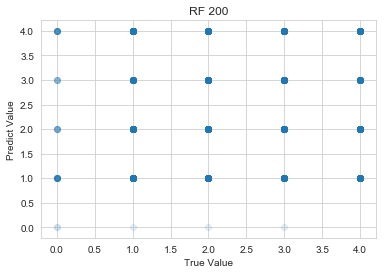


Precision:  [0.4        0.31188119 0.33988212 0.32517483 0.48492462]
Recall:  [0.04347826 0.32142857 0.32037037 0.21136364 0.66323024]



In [52]:
test_model, df_importance = run_experiment('RF 200', RandomForestClassifier(n_estimators=200), X_train, y_train, X_test)

In [53]:
# cross validation
k = 10
results = []
kf = KFold(n_splits=k)
for train_index, test_index in kf.split(X):
    X_valid_train, X_valid_test = X.values[train_index], X.values[test_index]
    y_valid_train, y_valid_test = y.values[train_index], y.values[test_index]
    test_model.fit(X_valid_train, y_valid_train.ravel())
    y_valid_pred = test_model.predict(X_valid_test)
    kappa = cohen_kappa_score(y_valid_test, y_valid_pred, weights ='quadratic')
    results.append(round(kappa, 4))

print('Kappa for each fold:', results)
print('AVG(kappa)', round(np.mean(results), 4))
print('STD(kappa)', round(np.std(results), 4))

Kappa for each fold: [0.3076, 0.3578, 0.3581, 0.2968, 0.325, 0.3043, 0.2785, 0.3343, 0.333, 0.2798]
AVG(kappa) 0.3175
STD(kappa) 0.0274


## Feature Importance
Try to narrow down and include only important features in the model.

In [54]:
X_importance = df_importance[df_importance['Importance']>0.0001]['Feature'].tolist()

In [55]:
# split the data using sklearn
threshold = 0.8
X = df_train[X_importance]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (8000, 190)
y_train (8000, 1)
X_test (2000, 190)
y_test (2000, 1)


In [56]:
test_model2 = model_training(RandomForestClassifier(n_estimators=200), X_train, y_train)
predictions2 = model_prediction(test_model2, X_test)
kappa = cohen_kappa_score(y_test, predictions2, weights ='quadratic')
print('Kappa', round(kappa, 4))
print('')
print(confusion_matrix(y_test, predictions2))

Kappa 0.336

[[  2  14  15   8  14]
 [  5 135 133  55  85]
 [  1 132 173 104 140]
 [  1  63 107 116 135]
 [  1  57  88  46 370]]


## Submission

In [57]:
submission_model = RandomForestClassifier(n_estimators=200).fit(df_train[X_importance], df_train[y_column].values.ravel())
df_test['AdoptionSpeed'] = submission_model.predict(df_test[X_importance])

In [58]:
df_test[['PetID', 'AdoptionSpeed']].to_csv('1260pets_kagggle.csv', index=False)